# Content

**You are owning a supermarket mall and through membership cards , you have some basic data about your customers like `Customer ID`, `age`, `gender`, `annual income` and `spending score`.
`Spending Score` is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.**

### Problem Statement

**You have to answer two questions:**
1. Does gender affect the store's annual income?
2. Does gender affect the store's spending score?

### Columns

- `CustomerID` - Unique ID assigned to the customer
- `Gender` - Gender of the customer
- `Age` - Age of the customer
- `Annual Income (k$)` - Annual Income of the customer
- `Spending Score (1-100)` - Score assigned by the mall based on customer behavior and spending nature

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={"figure.figsize": [18, 7]}, font_scale=2)
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Step 1. General information

In [2]:
mall = pd.read_csv('mall_customers.csv')
print(mall.info(), '\n')
print(mall.describe(), '\n')
print(mall.head(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None 

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000  

**We have just 200 rows and 5 columns. There are no missing values, all data types are correct. We just have to check if there are outliers**

# Step 2. Data preprocessing

In [3]:
# changing column names, just more convenient for me
new_columns = ['id', 'gender', 'age', 'annual_income', 'spending_score']
mall.columns = new_columns

# Step 3. EDA

In [4]:
mall.drop('id', axis=1).describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


**For all columns, medain is approximately equal to mean. There is not much difference between the maximum value and 75 percentile. This all means that the data does not contain outliers.**

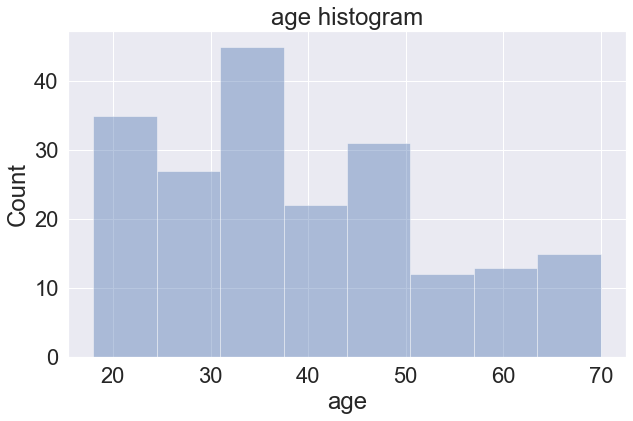

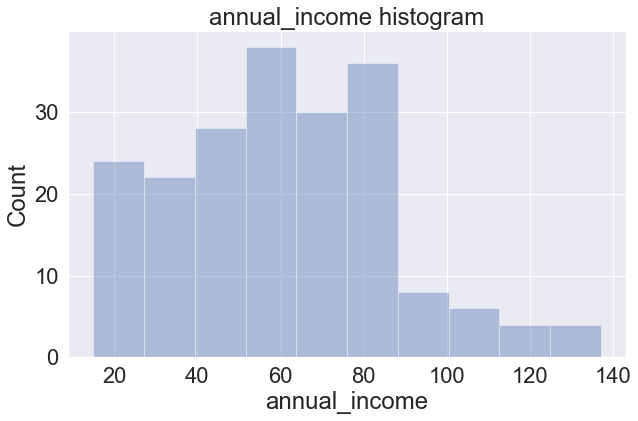

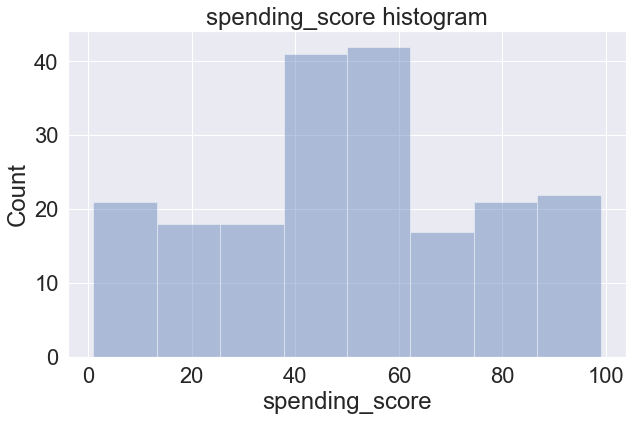

In [26]:
numerical_columns = ['age', 'annual_income', 'spending_score']
for column in numerical_columns:
    title = str(column) + ' histogram'
    plt.figure(figsize=(10, 6))
    sns.distplot(mall[column], kde=False).set(title=title, ylabel='Count')
    plt.show()

**All graphs are not normally distributed**

# Step 4. Testing hypotheses

### 1. Does gender affect the store's annual income?

In [40]:
# male and female customers
male_customers = mall.query('gender == "Male"')
female_customers = mall.query('gender == "Female"')
print(f'Number of male customers: {male_customers.shape[0]}')
print(f'Number of female customers: {female_customers.shape[0]}')

Number of male customers: 88
Number of female customers: 112


**As we want to test hypotheses, we need the samples to be the same size. So, we have to select 88 random rows from `female_customers`.**

In [43]:
# choosing 88 rows
female_customers = female_customers.sample(n=male_customers.shape[0], random_state=0)

In [45]:
alpha = .05

stat, p_value = mannwhitneyu(male_customers['annual_income'], female_customers['annual_income'])
print('stat=%.3f, p_value=%.3f' % (stat, p_value))
if p_value > alpha:
    print("Accept null hypothesis")
else:
    print('Reject null hypothesis')

stat=3479.000, p_value=0.123
Accept null hypothesis


**Data is not normally distributed, we should use `Nonparametric Statistical Hypothesis Tests`. I will use `Mann-Whitney U Test`.**

**Assumptions**
- **Observations in each sample are independent and identically distributed (iid).**
- **Observations in each sample can be ranked.**

**Interpretation**
- **Null hypotheisis:"There is no difference in distributions between male and female `annual income` for mall."**
- **Alternative hypothesis:"There is difference in distributions between male and female `annual income` for mall."**


### 2. Does gender affect the store's spending score?

In [46]:
alpha = .05

stat, p_value = mannwhitneyu(male_customers['spending_score'], female_customers['spending_score'])
print('stat=%.3f, p_value=%.3f' % (stat, p_value))
if p_value > alpha:
    print("Accept null hypothesis")
else:
    print('Reject null hypothesis')

stat=3747.000, p_value=0.356
Accept null hypothesis


**Data is not normally distributed, we should use `Nonparametric Statistical Hypothesis Tests`. I will use `Mann-Whitney U Test`.**

**Assumptions**
- **Observations in each sample are independent and identically distributed (iid).**
- **Observations in each sample can be ranked.**

**Interpretation**
- **Null hypotheisis:"There is no difference in distributions between male and female `spending score` for mall."**
- **Alternative hypothesis:"There is difference in distributions between male and female `spending score` for mall."**